[*********************100%***********************]  1 of 1 completed
[[0.51220655 0.48779345]
 [0.45126628 0.54873372]
 [0.41262329 0.58737671]
 ...
 [0.4839723  0.5160277 ]
 [0.52477648 0.47522352]
 [0.32739515 0.67260485]]
[[179 254]
 [186 301]]
              precision    recall  f1-score   support

          -1       0.49      0.41      0.45       433
           1       0.54      0.62      0.58       487

   micro avg       0.52      0.52      0.52       920
   macro avg       0.52      0.52      0.51       920
weighted avg       0.52      0.52      0.52       920

0.5217391304347826


C:\Users\manigandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manigandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manigandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manigandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manigandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

[0.55194805 0.48701299 0.51140065 0.52442997 0.52614379 0.51960784
 0.50980392 0.5        0.52287582 0.50326797]
0.5156491004258775


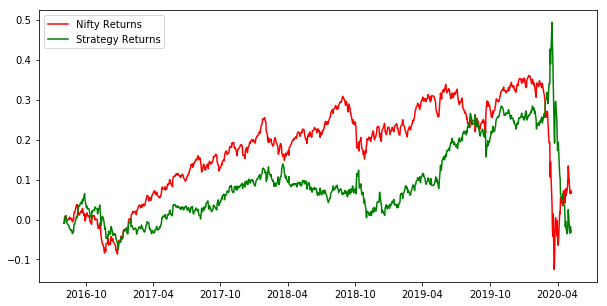

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  4 17:55:08 2019

@author: trainee
"""

# ## Import the Libraries

# Data Manupulation
import numpy as np
import pandas as pd

# Techinical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


# ## Import the data
df = pdr.get_data_yahoo('^NSEI', '2000-08-05', '2020-09-05')
df = df.dropna()
df = df.iloc[:,:4]
df.head()


# ## Create Indicators
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

# ## Logistic Regression

# ### Split the Dataset and Instantiate Logistic Regression
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = LogisticRegression()
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

print(metrics.confusion_matrix(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

print(model.score(X_test,y_test))  

cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


# ## Create a Trading Strategy
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [14]:
df.loc[:,"Nifty_returns"]

Date
2007-10-12         NaN
2007-10-15    0.043643
2007-10-16   -0.000415
2007-10-17   -0.019373
2007-10-18   -0.038189
                ...   
2020-05-04   -0.059161
2020-05-05   -0.009503
2020-05-06    0.007069
2020-05-07   -0.007780
2020-05-08    0.005686
Name: Nifty_returns, Length: 3066, dtype: float64

In [15]:
df.loc[:,"Startegy_returns"]

Date
2007-10-12         NaN
2007-10-15   -0.043643
2007-10-16   -0.000415
2007-10-17   -0.019373
2007-10-18    0.038189
                ...   
2020-05-04   -0.059161
2020-05-05    0.009503
2020-05-06    0.007069
2020-05-07   -0.007780
2020-05-08   -0.005686
Name: Startegy_returns, Length: 3066, dtype: float64